***AdaBoostClassifier***

In [320]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [321]:
X, y = make_classification(n_samples=1000, n_features=20, 
                           n_informative=15, n_redundant=5, 
                           random_state=42)

In [322]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [323]:
ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42)

In [324]:
ada.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.5, n_estimators=100, random_state=42)

In [325]:
y_pred = ada.predict(X_test)

In [326]:
ada.score(X_train,y_train)

0.94

In [327]:
ada.score(X_test,y_test)

0.8533333333333334

In [328]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8533333333333334


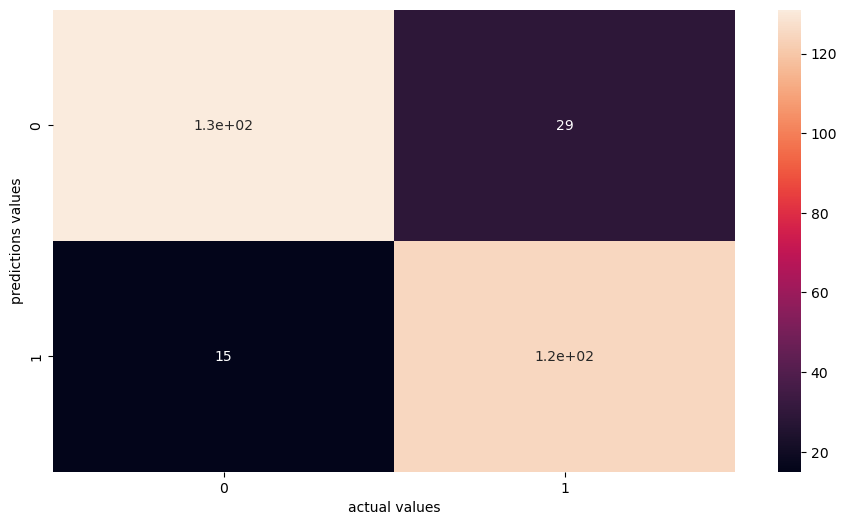

In [329]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(11,6))
sns.heatmap(cm,annot=True)
plt.xlabel('actual values')
plt.ylabel('predictions values')
plt.show()

***AdaBoostRegressor***

In [330]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,median_absolute_error

In [331]:
data=pd.read_csv('../data/houses.csv')
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,price
0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,22.19
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,53.80
2,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,18.00
3,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,60.40
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,51.00


In [333]:
data.isna().sum()

bedrooms         1
bathrooms        1
sqft_living      1
sqft_lot         1
floors           1
waterfront       1
view             1
condition        1
grade            1
sqft_above       1
sqft_basement    1
yr_built         1
yr_renovated     1
zipcode          1
lat              1
long             1
sqft_living15    1
price            1
dtype: int64

In [334]:
from sklearn.impute import SimpleImputer
im=SimpleImputer(missing_values=np.nan,strategy='mean')
data=im.fit_transform(data)

In [335]:
input=data[ : , : -1]
output=data[ : ,-1]

In [336]:
x_train,x_test,y_train,y_test=train_test_split(input,output,test_size=0.2,random_state=10)

In [337]:
model=AdaBoostRegressor(n_estimators=200,learning_rate=0.1,loss='linear')

In [338]:
model.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=0.1, n_estimators=200)

In [339]:
model.score(x_train,y_train)

0.8166387959581801

In [340]:
model.score(x_test,y_test)

0.7415378898994076

In [341]:
pred_y=model.predict(x_test)

In [342]:
print(f'MAE:{mean_absolute_error(y_test,pred_y)}')
print(f'MSE:{mean_squared_error(y_test,pred_y)}')
print(f'Median AE:{median_absolute_error(y_test,pred_y)}')

MAE:13.194572081456132
MSE:367.74944214766685
Median AE:10.310083074523924
